Nama : Fajar G Kmean

In [1]:
# import library yang dibutuhkan

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!wget -O Data_gizi.csv https://raw.githubusercontent.com/solehT10/Data-Gizi-Buruk/master/Kel%20Batuceper%20file.csv

--2020-01-15 02:34:32--  https://raw.githubusercontent.com/solehT10/Data-Gizi-Buruk/master/Kel%20Batuceper%20file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18669 (18K) [text/plain]
Saving to: ‘Data_gizi.csv’

Data_gizi.csv       100%[===================>]  18.23K  --.-KB/s    in 0.007s  

2020-01-15 02:34:32 (2.55 MB/s) - ‘Data_gizi.csv’ saved [18669/18669]



In [0]:
np.random.seed(0)

In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

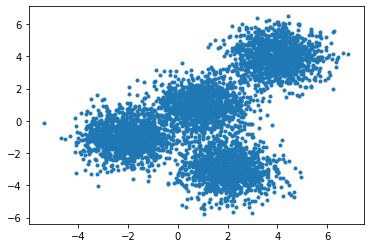

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

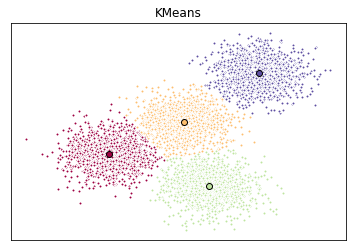

In [10]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [11]:
import pandas as pd
cust_df = pd.read_csv("Data_gizi.csv")
cust_df.head()

,No,jenis kelamin,BBTB,BBU,TBU,Status gizi,Unnamed: 6
0,1,L,0.35,0.65,-0.27,1,NaN
1,2,L,0.41,1.19,-0.75,1,NaN
2,3,L,-0.02,-0.38,0.31,1,NaN
3,4,L,-0.43,-0.64,0.04,1,NaN
4,5,L,-0.84,1.11,-2.07,1,NaN


In [13]:
df = cust_df.drop('Unnamed: 6', axis=1)
df.head()

,No,jenis kelamin,BBTB,BBU,TBU,Status gizi
0,1,L,0.35,0.65,-0.27,1
1,2,L,0.41,1.19,-0.75,1
2,3,L,-0.02,-0.38,0.31,1
3,4,L,-0.43,-0.64,0.04,1
4,5,L,-0.84,1.11,-2.07,1
